<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 1 // Publication-Grade Plot</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 1: Publication-Grade Plot\
Last Updated: July 30, 2021\
Author: Resha Dirga

## Publication-grade Plot Introduction

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:

* `lsoa_code`: this represents a policing area
* `borough`: the london borough for which the statistic is related
* `major_category`: the major crime category
* `minor_category`: the minor crime category
* `value`: the count of the crime for that particular borough, in that particular month
* `year`: the year of the summary statistic
* `month`: the month of the summary statistic

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:

* What is the change in the number of crime incidents from 2011 to 2016?
* What were the top 3 crimes per borough in 2016?

Please make sure that you have completed the session for this course, namely Advanced Visualization which is part of this Program.

Note: You can take a look at Project Rubric below:

Criteria |	Meet Expectations
---|---
Area Plot |	Mengimplementasikan Area Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik
Histogram |	Mengimplementasikan Histogram Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Bar Chart | Mengimplementasikan Bar Chart Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Pie Chart |	Mengimplementasikan Pie Chart Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Box Plot |	Mengimplementasikan Box Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Scatter Plot |	Mengimplementasikan Scatter Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Word Clouds |	Mengimplementasikan Word Clouds Menggunakan `Wordclouds` Library Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Folium Maps |	Mengimplementasikan London Maps Menggunakan `Folium`.
Preprocessing |	Student Melakukan Preproses Dataset Sebelum Menerapkan Visualisasi. | | Apakah Kode Berjalan Tanpa Ada Eror?
Apakah Kode Berjalan Tanpa Ada Eror? |	Seluruh Kode Berfungsi Dan Dibuat Dengan Benar.
Area Plot |	Menarik Informasi/Kesimpulan Berdasarkan Area Plot Yang Telah Student Buat
Histogram |	Menarik Informasi/Kesimpulan Berdasarkan Histogram Yang Telah Student Buat
Bar Chart |	Menarik Informasi/Kesimpulan Berdasarkan Bar Chart Yang Telah Student Buat
Pie Chart |	Menarik Informasi/Kesimpulan Berdasarkan Pie Chart Yang Telah Student Buat
Box Plot |	Menarik Informasi/Kesimpulan Berdasarkan Box Plot Yang Telah Student Buat
Scatter Plot |	Menarik Informasi/Kesimpulan Berdasarkan Scatter Plot Yang Telah Student Buat
Overall Analysis |	Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis.

**Focus on "Graded-Function" sections.**

------------

<h3>Chapter 0: Import modules</h3>
<p>This chapter lists all modules that being used on this document. The module import process will be performed on this chapter</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
import folium

<h3>Chapter 1: Data overview</h3>
<p>This chapter reads the data and provides an overview of the data, such as: the name of columns, number of values, data types within each columns. The first 5 data is also shown to get better understanding of the data.</p>

In [2]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')

In [3]:
# Data types and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [4]:
# Data samples - head
df.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
# Data description
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [6]:
# Merge month and year into date format to simplify dating
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df

,lsoa_code,borough,major_category,minor_category,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11-01
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11-01
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05-01
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03-01
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06-01
...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,2015-02-01
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,2015-06-01
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,2011-02-01
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,2011-05-01


<h3>Chapter 2: Data Visualisation</h3>
<p>This chapter provides data visualisation exhibits and insights that may be concluded from the visualisation</p>

<h4>Exhibit 1 - Area Plot</h4>

<h5>Questions:</h5>
<p>Is there any seasonal trend to the number of crimes?</p>

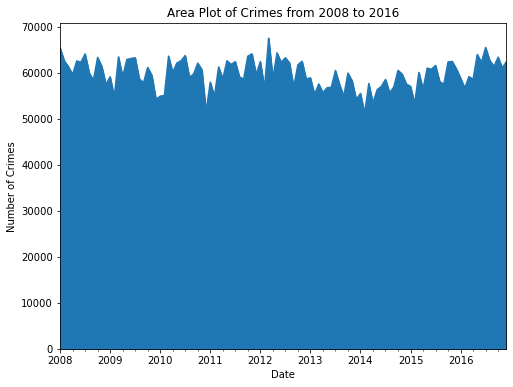

In [7]:
# Stage dataframe for plotting

df_area = df.groupby(['date']).sum()['value']
df_area.plot(kind='area', figsize=(8,6))

# Set axis to the graphs
plt.title('Area Plot of Crimes from 2008 to 2016') # add a title to the area plot
plt.ylabel('Number of Crimes') # add y-label
plt.xlabel('Date') # add x-label

plt.show()

<h5>Insights:</h5>
<ul>
    <li>There is a 4-year trend of which the number of crime dip and spikes every four years. For example in from 2008 to 2010, the number of crimes declined gradually. But then it increased and spiked in 2012. The similar trend happened betwaeen 2012 until 2016</li>
    <li>Every year, the number of crimes spikes on Q1 and Q3, but then it dips on Q2 and Q4</li>
    <li>All in all, there are no significant changes on the number of crime trends over 8 years (from 2008 to 2016)</li>
</ul>

<h4>Exhibit 2 - Histogram</h4>

<h5>Questions:</h5>
<p>What are the most common major crimes happened?</p>

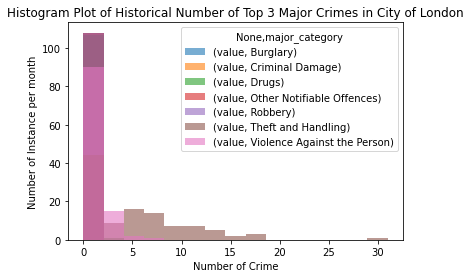

In [8]:
# Stage dataframe for plotting
df_hist = df[df['borough'].isin(['City of London'])]
df_hist = df_hist.groupby(['date','major_category']).agg({
    'value':'sum'
})
df_hist = df_hist.unstack('major_category')

df_hist.plot(kind='hist',
            bins=15,
            alpha=0.6,
            )

# # Set axis to the graphs
plt.title('Histogram Plot of Historical Number of Top 3 Major Crimes in City of London') # add a title to the area plot
plt.ylabel('Number of Instance per month') # add y-label
plt.xlabel('Number of Crime') # add x-label

plt.show()

<h5>Insights:</h5>
<ul>
    <li>Theft and Handling Crime is the most frequent crime happened in the City of London, which can reach up to 15-30 cases in a month</li>
    <li>Violence Against the Person becomes the second most frequent crime in the City of London, which can ranging from 3 - 7 cases per month</li>
    <li>Other cases is rarely happened (0 - 1 cases per month)</li>
</ul>

<h4>Exhibit 3 - Bar Chart</h4>

<h5>Questions:</h5>
<p>Which borough has the most and the least crime happened in the last 5 years</p>

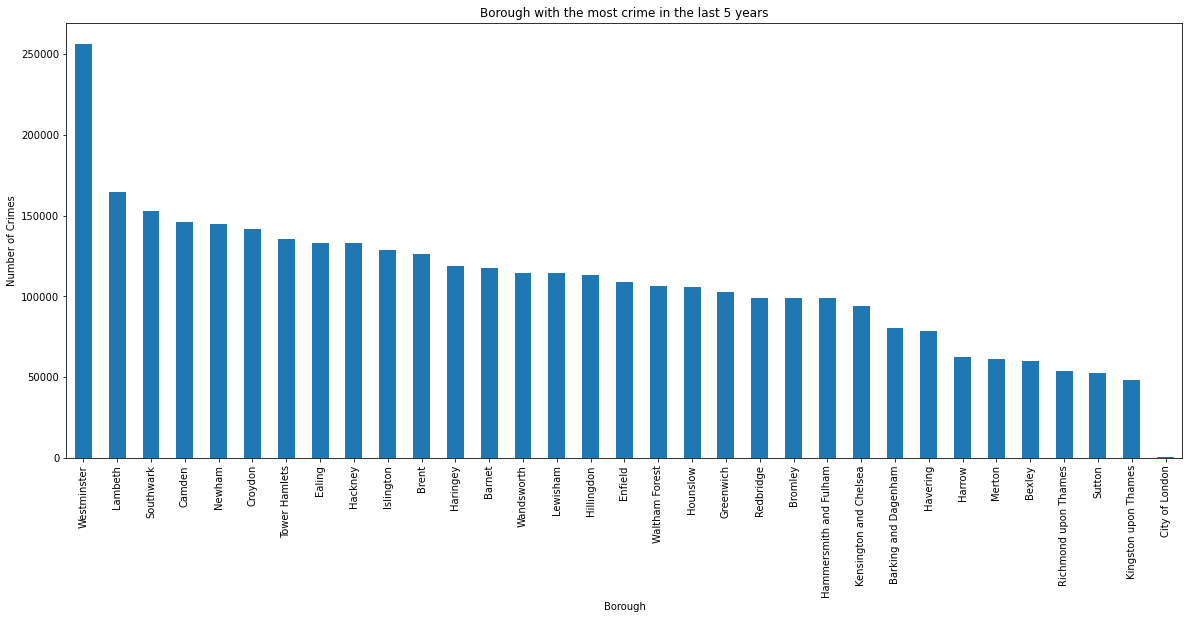

In [9]:
# Stage dataframe for plotting

df_area = df[df['year'].isin([2012,2013,2014,2015,2016])]
df_area = df_area.groupby(['borough']).sum()['value']
df_area = df_area.sort_values(ascending=False)
df_area.plot(kind='bar', figsize=(20,8))

# Set axis to the graphs
plt.title('Borough with the most crime in the last 5 years') # add a title to the area plot
plt.ylabel('Number of Crimes') # add y-label
plt.xlabel('Borough') # add x-label

plt.show()

<h5>Insights:</h5>
<ul>
    <li>Westminster has the highest number of crimes in the last 5 years. The occurance is significantly higher compared to other boroughs</li>
    <li>Crime almost never happened in the City of London (close to 0)</li>
</ul>

<h4>Exhibit 4 - Pie Chart</h4>

<h5>Questions:</h5>
<p>What are the most common major crimes happened in the last 5 years?</p>

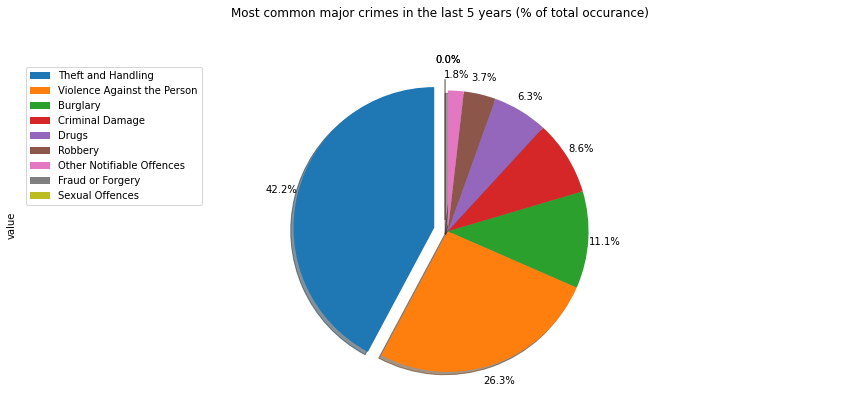

In [10]:
# Stage dataframe for plotting

df_pie = df[df['year'].isin([2012,2013,2014,2015,2016])]
df_pie = df_pie.groupby('major_category', axis=0).sum()
df_pie = df_pie.sort_values(by=['value'], ascending=False)

# ratio for each continent with which to offset each wedge.
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]

# Graded-Funtion Begin (~8 Lines)
df_pie['value'].plot(kind='pie',
                      figsize=(15, 6),
                      autopct='%1.1f%%',
                      startangle=90,
                      shadow=True,
                      labels=None,         # turn off labels on pie chart
                      # the ratio between the center of each pie slice and the start of the text generated by autopct
                      pctdistance=1.12,
                      explode=explode_list  # 'explode'
                      )
# Graded-Funtion End

# scale the title up by 12% to match pctdistance
plt.title('Most common major crimes in the last 5 years (% of total occurance)', y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=df_pie.index, loc='upper left')

plt.show()

<h5>Insights:</h5>
<ul>
    <li>The 3 crimes in London based on its occurance in the last 5 years is: Theft and Handling, Violence Against the Person, and Burglary</li>
    <li>Theft and Handling crime and Violence Against the Person crime is significantly higher than other types of crime</li>
    <li>Fraud or Forgery and Secual Offences is never happened in the last 5 years</li>
</ul>

<h4>Exhibit 5 - Box Plot</h4>

<h5>Questions:</h5>
<p>On the top 3 borough with high crime numbers, does the situation improved over the past 5 years?</p>

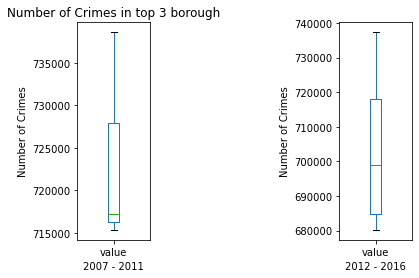

In [11]:
# Set subplot
fig = plt.figure()
ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,4)

# Stage dataframe for plotting
df_box = df[df['borough'].isin(['Westminster', 'Lambeth', 'Southwark'])]

# First 5 years
df_box_firstfive = df[df['year'].isin(range(2007,2011))]
df_box_firstfive = df_box_firstfive.groupby(['year'], axis=0).sum()['value']

df_box_firstfive.plot(kind='box', ax=ax0)

# Second 5 years
df_box_secondfive = df[df['year'].isin(range(2012,2016))]
df_box_secondfive = df_box_secondfive.groupby(['year'], axis=0).sum()['value']

df_box_secondfive.plot(kind='box', ax=ax1)

# Set axis to the graphs
ax0.set_title('Number of Crimes in top 3 borough')
ax0.set_xlabel('2007 - 2011')
ax0.set_ylabel('Number of Crimes')

ax1.set_xlabel('2012 - 2016')
ax1.set_ylabel('Number of Crimes')

plt.show()

<h5>Insights:</h5>
<ul>
    <li>Average annual number of crimes in the top 3 borough is lowered (from a little more than 715k per year to a little less than 700k per year)</li>
    <li>This improvement is significant since the least annual number of crime between 2017 - 2011 is still higher than the average of annual number of crime between 2012 - 2016</li>
    <li>However the highest annual number is still more than 730k cases in a year </li>
</ul>

<h4>Exhibit 6 - Scatter Plot</h4>

<h4>Question</h4>
<p>On the top 3 borough with high crime numbers, what was the number of crime trends each year?</p>

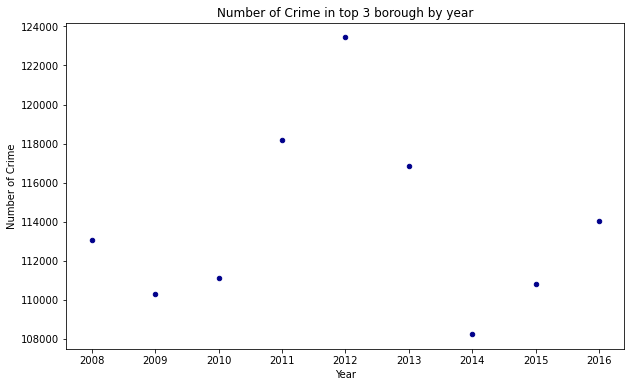

In [12]:
# Stage dataframe for plotting
df_scat = df[df['borough'].isin(['Westminster', 'Lambeth', 'Southwark'])]
df_scat = pd.DataFrame(df_scat.groupby(['year']).sum())
df_scat.reset_index(inplace=True)
df_scat['year'] = range(2008,2017)

df_scat.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='darkblue')

# Set axis to the graphs
plt.title('Number of Crime in top 3 borough by year')
plt.xlabel('Year')
plt.ylabel('Number of Crime')

plt.show()

<h5>Insights:</h5>
<ul>
    <li>The number of crime experienced a significant spike in 2011 and 2012, peaking at almost 122k total cases on the top 3 borough</li>
    <li>After the 2012, the number of crimes declined to its lowest number on a little more than 108k cases</li>
    <li>The seasonal crime pattern also applies here, which the number of crimes dip and rose every 4 years</li>
</ul>

<h4>Exhibit 7 - Word Clouds</h4>

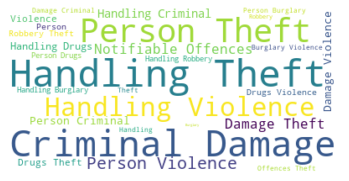

In [13]:
# Data stagging for visualisation

df_woc = df[df['year'].isin([2012,2013,2014,2015,2016])]
df_woc = df_woc[df_woc['borough'].isin(['City of London'])]
df_woc = df_woc['major_category'].str.cat(sep=' ')

# make word cloud
stopwords = set(STOPWORDS)

df_wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate word cloud
df_wordcloud.generate(df_woc)

plt.imshow(df_wordcloud, interpolation='bilinear')

plt.axis('off')
plt.show()

<h4>Exhibit 8 - Folium Maps</h4>

In [14]:
# Set latitude and longitude
latitude = 51.5074
longitude = 0.1278

# Generate Folium Map
london_map = folium.Map(location=[latitude,longitude], zoom_start=8)
    
london_map